# Predicting Insurance Claims filed by Travelling Agencies

In [1]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))
print('')
cols=list(df.columns)
continous=list(set(df._get_numeric_data().columns)-{'Duration','Age'})
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)
# Duration and Age are categorical ( done in EDA part [Ayush_Project.ipynb] )
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

The dataset has 63326 Rows and 11 Columns

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Product Name', 'Duration', 'Age', 'Gender', 'Claim', 'Agency Type', 'Agency', 'Destination', 'Distribution Channel']


In [5]:
a=list(df_['Destination'].unique())
aa=list(df_['Agency'].unique())

In [6]:
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]
print("Now the dataset  has {} Rows and {} Columns".format(df_.shape[0],df_.shape[1]))
print("%d records deleted from the dataset"%(df.shape[0]-df_.shape[0]))
df_=df_.reset_index().drop(columns='index')
df1=df_.copy()

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [7]:
b=list(df_['Destination'].unique())
bb=list(df_['Agency'].unique())

In [8]:
new=[]
for i in a :
  if(i not in list(b)):
    print(i)
    new.append(i)
for i in aa:
  if(i not in list(bb)):
    print(i)
    new.append(i)

KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF
TIBET
JWT


In [9]:
df.loc[df['Destination'].isin(new) ]#| df['Agency'].isin(new)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.1,NaN,118
56265,EPX,Travel Agency,Offline,2 way Comprehensive Plan,No,29,TIBET,24.0,0.0,NaN,118


In [10]:
# Label Encoding
le=LabelEncoder()
le_df=pd.DataFrame()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  le_df[i]=le.fit_transform(df_[i])
for j in list(df_._get_numeric_data().columns):
  le_df[j]=df_[j]
print("Label Encoded dataset  has {} Rows and {} Columns".format(le_df.shape[0],le_df.shape[1]))

Label Encoded dataset  has 62342 Rows and 11 Columns


In [11]:
relation=dict()
for l in list(set(df_.columns)-set(df_._get_numeric_data().columns)):
  indx=[]
  for x in df_[l].unique():
    #print(x,' ',df_.index[df_[l] == x].tolist()[0])
    indx.append(df_.index[df_[l] == x].tolist()[0])
  dic=dict(zip(le_df.loc[indx][l].to_list(),df_.loc[indx][l].to_list()))
  relation[l]=dic
  print(dic)

{12: 'Comprehensive Plan', 16: 'Rental Vehicle Excess Insurance', 25: 'Value Plan', 8: 'Basic Plan', 15: 'Premier Plan', 1: '2 way Comprehensive Plan', 9: 'Bronze Plan', 17: 'Silver Plan', 4: 'Annual Silver Plan', 10: 'Cancellation Plan', 0: '1 way Comprehensive Plan', 22: 'Ticket Protector', 2: '24 Protect', 13: 'Gold Plan', 3: 'Annual Gold Plan', 20: 'Single Trip Travel Protect Silver', 14: 'Individual Comprehensive Plan', 21: 'Spouse or Parents Comprehensive Plan', 7: 'Annual Travel Protect Silver', 19: 'Single Trip Travel Protect Platinum', 5: 'Annual Travel Protect Gold', 18: 'Single Trip Travel Protect Gold', 6: 'Annual Travel Protect Platinum', 11: 'Child Comprehensive Plan', 23: 'Travel Cruise Protect', 24: 'Travel Cruise Protect Family'}
{0: 'F', 2: 'N', 1: 'M'}
{1: 'Travel Agency', 0: 'Airlines'}
{0: 'No', 1: 'Yes'}
{3: 'CBH', 6: 'CWT', 8: 'JZI', 9: 'KML', 7: 'EPX', 2: 'C2B', 11: 'RAB', 12: 'SSI', 1: 'ART', 5: 'CSR', 4: 'CCR', 0: 'ADM', 10: 'LWC', 14: 'TTW', 13: 'TST'}
{78: '

In [12]:
#OneHotEncoding
ohe=OneHotEncoder()
ohe_df=df_.copy()
for i in list(set(df_.columns)-set(df_._get_numeric_data().columns)-{'Claim'}):
  ohe_df = pd.get_dummies(ohe_df, columns=[i], prefix=[i] )
ohe_df=ohe_df.drop(columns='Claim')
print("One Hot Encoded dataset  has {} Rows and {} Columns".format(ohe_df.shape[0],ohe_df.shape[1]))

One Hot Encoded dataset  has 62342 Rows and 199 Columns


In [13]:
def print_result(y_test,y_pred):
  print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
  print("Accuracy of Model      : ",accuracy_score(y_test, y_pred))
  print("Precision of Model     : ",precision_score(y_test, y_pred))
  print("Recall of Model        : " , recall_score(y_test, y_pred))
  print("F1 Score of Model      : " ,f1_score(y_test, y_pred))
  print("ROC_AUC score of Model : " ,roc_auc_score(y_test,y_pred))	
  fpr, tpr, thresholds = roc_curve(y_test,y_pred)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='best')

In [14]:
def print_input(X_train, X_test, y_train, y_test):
  print("TRAIN(X_train) Feature set        : ",len(X_train))
  print("TRAIN(y_train) Label Feature set  : ",len(y_train))
  print("TEST (X_test)  Feature set        : ",len(X_test))
  print("TEST (y_test)  Label set          : ",len(y_test))
  print("-------For Training Set--------\n")
  print(y_train['Claim'].value_counts())
  l_1,l_2= y_train['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_train.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_train.shape[0])*100,"%")
  print("\n-------For Testing Set--------\n")
  print(y_test['Claim'].value_counts())
  l_1,l_2= y_test['Claim'].value_counts()
  print("Class Label 1 is : ",(l_1/y_test.shape[0])*100,"%")
  print("Class Label 0 is : ",(l_2/y_test.shape[0])*100,"%")

In [15]:
def balance(X_train,y_train,typ='ros'):
  if(typ.lower() == 'ros'):
    rus=RandomOverSampler(random_state=21)
    x_res, y_res = rus.fit_sample(X_train, y_train)
    print('Dataset shape after Random Over Sampling', Counter(y_res))
    print('After ROS the number of Rows Training set has are  : ', x_res.shape[0])
  elif(typ.lower() == 'rus' ):
    ros=RandomUnderSampler(random_state=21)
    x_res, y_res = ros.fit_sample(X_train, y_train)
    print('Dataset shape after Random Under Sampling', Counter(y_res))
    print('After RUS the number of Rows Training set has are : ', x_res.shape[0])
  return x_res, y_res


In [16]:
target = pd.DataFrame(le_df['Claim'])
le_df=le_df.drop(columns='Claim')

# **With Gender Column**

## LABEL ENCODING

In [34]:
X_train, X_test, y_train, y_test = train_test_split(le_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %
Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376
Dataset shape after Random Over Sampling Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set has are  :  92136


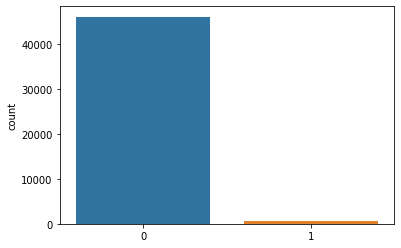

In [18]:
#Without Balancing
sns.countplot(y_train.values.ravel())

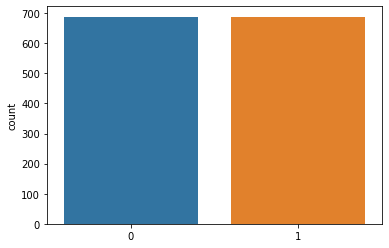

In [19]:
#After Random Under Sampling
sns.countplot(y_u_train)

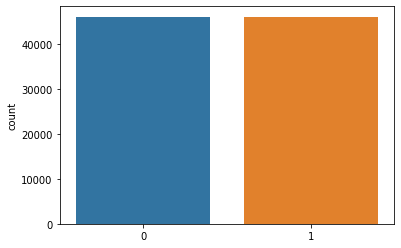

In [20]:
#After Random Over Sampling
sns.countplot(y_o_train)

### **Decision Tree**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15113   244]
 [  217    12]]
Accuracy of Model      :  0.9704221737456692
Precision of Model     :  0.046875
Recall of Model        :  0.05240174672489083
F1 Score of Model      :  0.049484536082474224
ROC_AUC score of Model :  0.5182566134158413


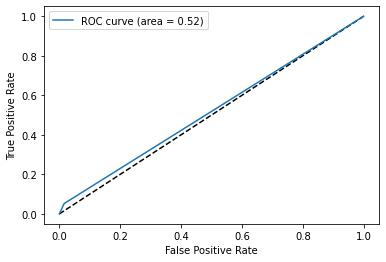

In [21]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Under sampling 

[1 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[10028  5329]
 [   85   144]]
Accuracy of Model      :  0.6526369819068395
Precision of Model     :  0.02631098118033985
Recall of Model        :  0.62882096069869
F1 Score of Model      :  0.05050859347597334
ROC_AUC score of Model :  0.6409065407778142


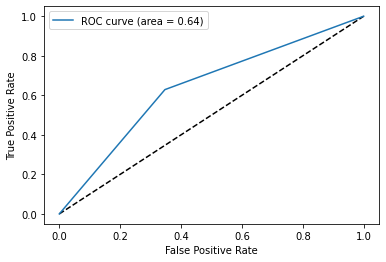

In [22]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_u_train, y_u_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Over Sampling


[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15118   239]
 [  210    19]]
Accuracy of Model      :  0.9711920954702938
Precision of Model     :  0.07364341085271318
Recall of Model        :  0.08296943231441048
F1 Score of Model      :  0.07802874743326489
ROC_AUC score of Model :  0.5337032484226216


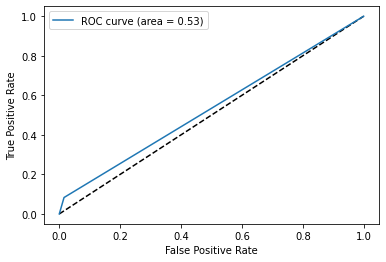

In [23]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_o_train, y_o_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15356     1]
 [  229     0]]
Accuracy of Model      :  0.9852431669446939
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.49996744155759587


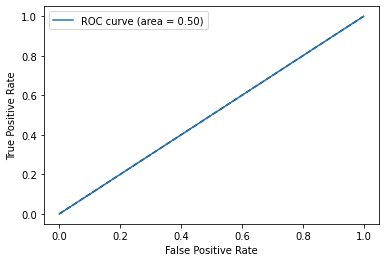

In [24]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Under sampling 

[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[12702  2655]
 [   81   148]]
Accuracy of Model      :  0.8244578467855768
Precision of Model     :  0.05280057081698181
Recall of Model        :  0.6462882096069869
F1 Score of Model      :  0.09762532981530342
ROC_AUC score of Model :  0.736701440220567


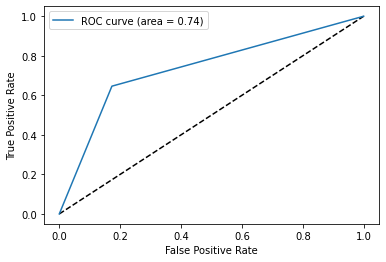

In [25]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_u_train, y_u_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Over Sampling


[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[12866  2491]
 [   82   147]]
Accuracy of Model      :  0.8349159502117285
Precision of Model     :  0.055724033358605006
Recall of Model        :  0.6419213973799127
F1 Score of Model      :  0.10254621555633066
ROC_AUC score of Model :  0.739857618661305


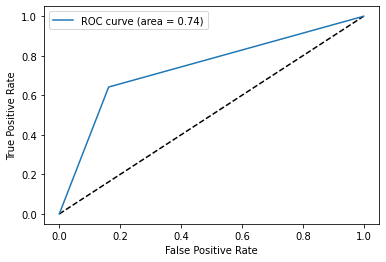

In [26]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_o_train, y_o_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15326    31]
 [  227     2]]
Accuracy of Model      :  0.9834466829205697
Precision of Model     :  0.06060606060606061
Recall of Model        :  0.008733624454148471
F1 Score of Model      :  0.015267175572519085
ROC_AUC score of Model :  0.5033575005125467


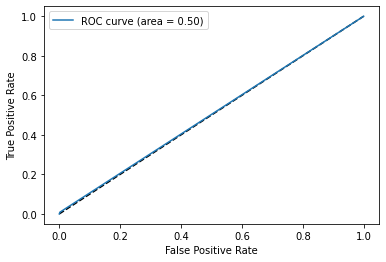

In [27]:
clf_dt = RandomForestClassifier(random_state=21)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Under sampling 

[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[11365  3992]
 [   67   162]]
Accuracy of Model      :  0.7395739766457077
Precision of Model     :  0.038998555609051515
Recall of Model        :  0.7074235807860262
F1 Score of Model      :  0.07392197125256673
ROC_AUC score of Model :  0.7237384883157845


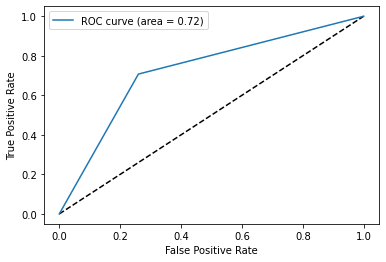

In [33]:
clf_dt = RandomForestClassifier(random_state=21)
clf_dt.fit(X_u_train, y_u_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Over Sampling


[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15233   124]
 [  222     7]]
Accuracy of Model      :  0.9778005902733222
Precision of Model     :  0.05343511450381679
Recall of Model        :  0.03056768558951965
F1 Score of Model      :  0.03888888888888889
ROC_AUC score of Model :  0.5112465959366496


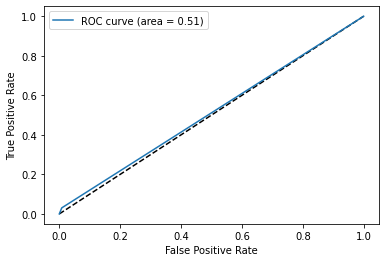

In [29]:
clf_dt = RandomForestClassifier(random_state=21)
clf_dt.fit(X_o_train, y_o_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( Lable Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[15062   295]
 [  209    20]]
Accuracy of Model      :  0.9676632875657641
Precision of Model     :  0.06349206349206349
Recall of Model        :  0.08733624454148471
F1 Score of Model      :  0.07352941176470588
ROC_AUC score of Model :  0.5340633817615283


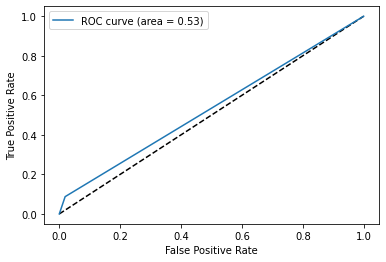

In [35]:
#Using GridSearch , find the optimal hyperparameters
param_grid = {
   'max_leaf_nodes': [ 100,200,1000,2000 ],
   'class_weight' : ['balanced'],
   'criterion' :['entropy','gini'], 
   'max_depth' : [ 100,500],
   'min_samples_split': [2],
   'max_features' : [5,8,10]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Under sampling 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=100, max_features=5,
                       max_leaf_nodes=100, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=21, splitter='best')
Confusion Matrix       : 
 [[10737  4620]
 [   72   157]]
Accuracy of Model      :  0.6989606056717567
Precision of Model     :  0.032865815365292025
Recall of Model        :  0.6855895196506551
F1 Score of Model      :  0.06272473032361167
ROC_AUC score of Model :  0.6923747559183145


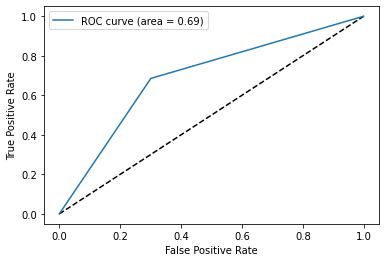

In [31]:
CV_dt.fit(X_u_train, y_u_train)
dtc_best = CV_dt.best_estimator_
y_pred = dtc_best.predict(X_test)
print(dtc_best)
print_result(y_test=y_test,y_pred=y_pred)

####Over Sampling


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=5, max_leaf_nodes=2000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[15125   232]
 [  212    17]]
Accuracy of Model      :  0.9715128961888875
Precision of Model     :  0.06827309236947791
Recall of Model        :  0.07423580786026202
F1 Score of Model      :  0.07112970711297072
ROC_AUC score of Model :  0.5295643452923763


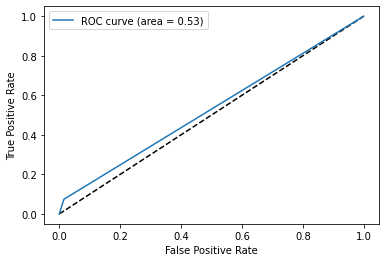

In [32]:
CV_dt.fit(X_o_train, y_o_train)
dtc_best = CV_dt.best_estimator_
y_pred = dtc_best.predict(X_test)
print(dtc_best)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix       : 
 [[15354     3]
 [  229     0]]
Accuracy of Model      :  0.9851148466572565
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.49990232467278767


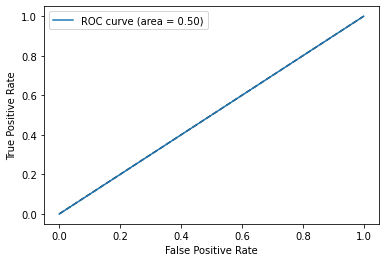

In [157]:
logistic_regression=LogisticRegression()
param_grid=param_grid={'multi_class':['ovr'],
            'random_state':[1],
               'solver':['saga'],
            'penalty':['elasticnet','l1','l2'],
            'C':[0.2,0.5,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Under sampling 

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix       : 
 [[11872  3485]
 [  112   117]]
Accuracy of Model      :  0.7692159630437572
Precision of Model     :  0.03248195446973903
Recall of Model        :  0.5109170305676856
F1 Score of Model      :  0.06108065779169929
ROC_AUC score of Model :  0.6419923435055007


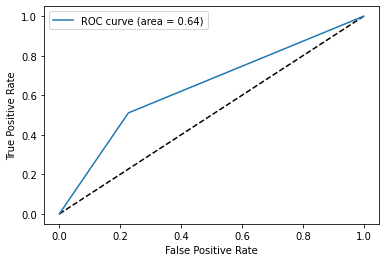

In [158]:
log_reg.fit(X_u_train, y_u_train)
logistic_reg_best_dt = log_reg.best_estimator_
y_pred = logistic_reg_best_dt.predict(X_test)
print(logistic_reg_best_dt)
print_result(y_test=y_test,y_pred=y_pred)

####Over Sampling


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12347  3010]
 [   96   133]]
Accuracy of Model      :  0.8007185936096497
Precision of Model     :  0.042316258351893093
Recall of Model        :  0.5807860262008734
F1 Score of Model      :  0.07888493475682087
ROC_AUC score of Model :  0.6923921014640494


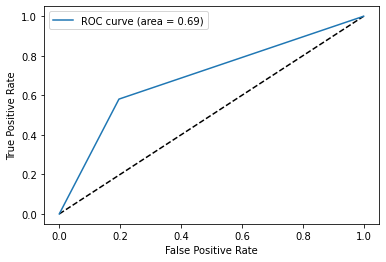

In [159]:
log_reg.fit(X_o_train, y_o_train)
logistic_reg_best_dt = log_reg.best_estimator_
y_pred = logistic_reg_best_dt.predict(X_test)
print(logistic_reg_best_dt)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13209  2148]
 [   85   144]]
Accuracy of Model      :  0.8567303990760939
Precision of Model     :  0.06282722513089005
Recall of Model        :  0.62882096069869
F1 Score of Model      :  0.11424038080126933
ROC_AUC score of Model :  0.7444749460653052


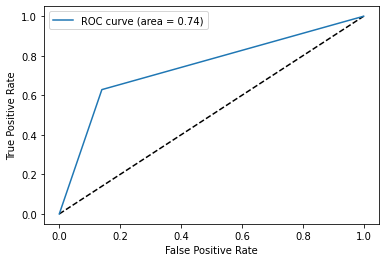

In [160]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40, 50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 50, 100 ],
   'min_samples_split': [ 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

#### Random Under Sampling

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12520  2837]
 [   70   159]]
Accuracy of Model      :  0.8134864622096754
Precision of Model     :  0.053070761014686246
Recall of Model        :  0.6943231441048034
F1 Score of Model      :  0.0986046511627907
ROC_AUC score of Model :  0.7547932709519264


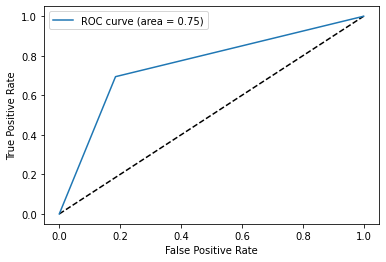

In [161]:
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
y_pred = clf_best_dt.predict(X_test)
print(clf_best_dt)
print_result(y_test=y_test,y_pred=y_pred)

#### Random Over Sampling

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12999  2358]
 [   80   149]]
Accuracy of Model      :  0.843577569613756
Precision of Model     :  0.059433585959313924
Recall of Model        :  0.6506550218340611
F1 Score of Model      :  0.10891812865497078
ROC_AUC score of Model :  0.7485547037281264


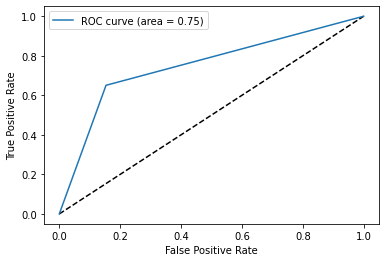

In [162]:
CV_dt.fit(X_o_train, y_o_train)
clf_best_dt = CV_dt.best_estimator_
y_pred = clf_best_dt.predict(X_test)
print(clf_best_dt)
print_result(y_test=y_test,y_pred=y_pred)

## ONE HOT ENCODING

In [130]:
X_train, X_test, y_train, y_test = train_test_split(ohe_df,target,test_size = 0.25, random_state = 21, stratify = target)
print_input(X_train, X_test, y_train, y_test)
X_u_train, y_u_train = balance(X_train, y_train.values.ravel(),'rus')
X_o_train, y_o_train = balance(X_train, y_train.values.ravel(),'ros')

TRAIN(X_train) Feature set        :  46756
TRAIN(y_train) Label Feature set  :  46756
TEST (X_test)  Feature set        :  15586
TEST (y_test)  Label set          :  15586
-------For Training Set--------

0    46068
1      688
Name: Claim, dtype: int64
Class Label 1 is :  98.52853109761314 %
Class Label 0 is :  1.4714689023868595 %

-------For Testing Set--------

0    15357
1      229
Name: Claim, dtype: int64
Class Label 1 is :  98.53073270884127 %
Class Label 0 is :  1.4692672911587321 %
Dataset shape after Random Under Sampling Counter({0: 688, 1: 688})
After RUS the number of Rows Training set has are :  1376
Dataset shape after Random Over Sampling Counter({0: 46068, 1: 46068})
After ROS the number of Rows Training set has are  :  92136


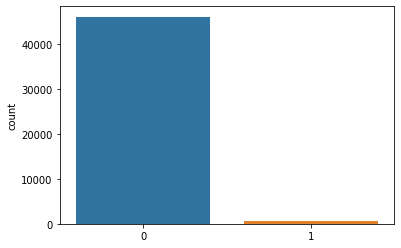

In [131]:
#Without Balancing
sns.countplot(y_train.values.ravel())

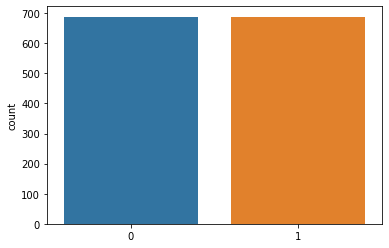

In [132]:
#After Random Under Sampling
sns.countplot(y_u_train)

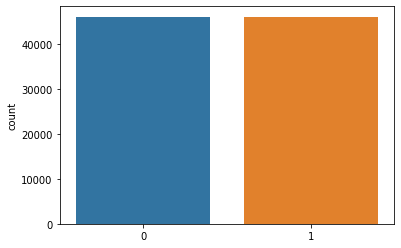

In [133]:
#After Random Over Sampling
sns.countplot(y_o_train)

### **Decision Tree**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15111   246]
 [  211    18]]
Accuracy of Model      :  0.970678814320544
Precision of Model     :  0.06818181818181818
Recall of Model        :  0.07860262008733625
F1 Score of Model      :  0.07302231237322515
ROC_AUC score of Model :  0.5312919332122558


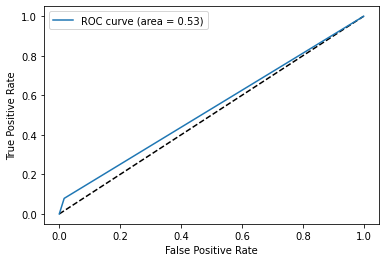

In [134]:
dtc = DecisionTreeClassifier(random_state=21)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

[1 1 0 ... 0 1 0]
Confusion Matrix       : 
 [[10306  5051]
 [   74   155]]
Accuracy of Model      :  0.6711792634415501
Precision of Model     :  0.029773338455628122
Recall of Model        :  0.6768558951965066
F1 Score of Model      :  0.05703771849126035
ROC_AUC score of Model :  0.6739752550150664


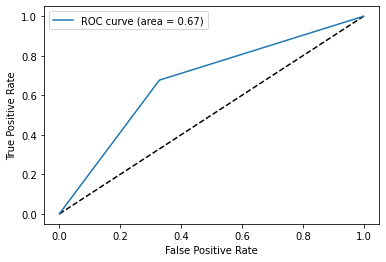

In [135]:
dtc.fit(X_u_train, y_u_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15086   271]
 [  212    17]]
Accuracy of Model      :  0.9690106505838573
Precision of Model     :  0.059027777777777776
Recall of Model        :  0.07423580786026202
F1 Score of Model      :  0.0657640232108317
ROC_AUC score of Model :  0.5282945660386157


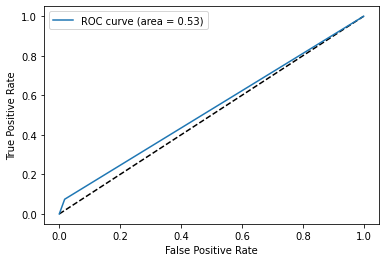

In [136]:
dtc.fit(X_o_train, y_o_train)
y_pred = dtc.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15357     0]
 [  229     0]]
Accuracy of Model      :  0.9853073270884127
Precision of Model     :  0.0
Recall of Model        :  0.0
F1 Score of Model      :  0.0
ROC_AUC score of Model :  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


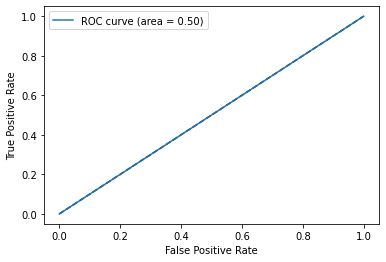

In [137]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

[1 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[11964  3393]
 [   62   167]]
Accuracy of Model      :  0.7783267034518158
Precision of Model     :  0.04691011235955056
Recall of Model        :  0.7292576419213974
F1 Score of Model      :  0.0881499076273423
ROC_AUC score of Model :  0.7541580258835352


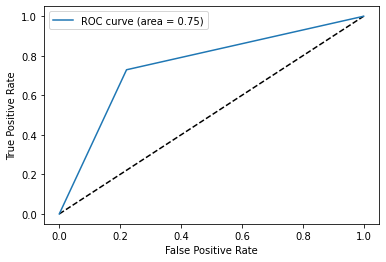

In [138]:
logistic_regression.fit(X_u_train, y_u_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

[1 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[12075  3282]
 [   63   166]]
Accuracy of Model      :  0.7853843192608752
Precision of Model     :  0.04814385150812065
Recall of Model        :  0.7248908296943232
F1 Score of Model      :  0.09029099809627415
ROC_AUC score of Model :  0.7555886068768548


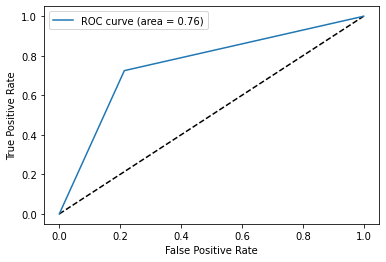

In [139]:
logistic_regression.fit(X_o_train, y_o_train)
y_pred=logistic_regression.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15320    37]
 [  227     2]]
Accuracy of Model      :  0.9830617220582574
Precision of Model     :  0.05128205128205128
Recall of Model        :  0.008733624454148471
F1 Score of Model      :  0.014925373134328356
ROC_AUC score of Model :  0.5031621498581219


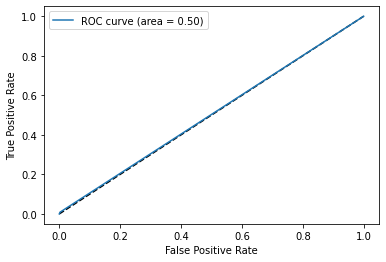

In [143]:
clf_dt = RandomForestClassifier(random_state=21)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

[0 0 0 ... 0 1 0]
Confusion Matrix       : 
 [[11487  3870]
 [   61   168]]
Accuracy of Model      :  0.7477864750417041
Precision of Model     :  0.041604754829123326
Recall of Model        :  0.7336244541484717
F1 Score of Model      :  0.0787438481368643
ROC_AUC score of Model :  0.7408110549703092


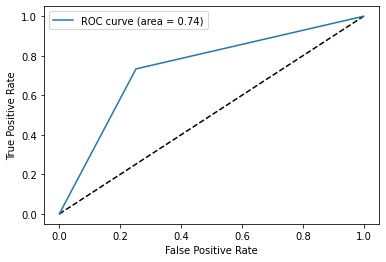

In [144]:
clf_dt.fit(X_u_train, y_u_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

[0 0 0 ... 0 0 0]
Confusion Matrix       : 
 [[15217   140]
 [  220     9]]
Accuracy of Model      :  0.9769023482612601
Precision of Model     :  0.06040268456375839
Recall of Model        :  0.039301310043668124
F1 Score of Model      :  0.04761904761904762
ROC_AUC score of Model :  0.515092473085258


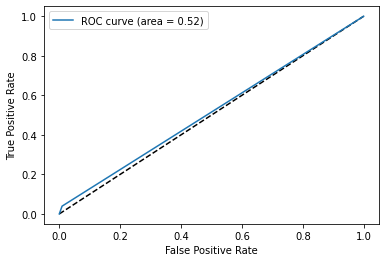

In [145]:
clf_dt.fit(X_o_train, y_o_train)
y_pred = clf_dt.predict(X_test)
print(y_pred)
print_result(y_test=y_test,y_pred=y_pred)

## Hyperparameter Tuning ( One Hot Encoding)

### **Decision Tree**

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=60, max_features=20, max_leaf_nodes=800,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[13330  2027]
 [  107   122]]
Accuracy of Model      :  0.8630822533042474
Precision of Model     :  0.05677059097254537
Recall of Model        :  0.5327510917030568
F1 Score of Model      :  0.10260723296888143
ROC_AUC score of Model :  0.7003795830983865


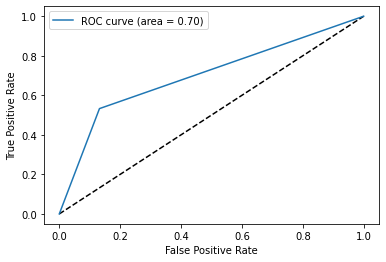

In [146]:
param_grid = {
   'max_leaf_nodes': [ 800 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'], 
   'max_depth' : [ 20,50,60],
   'min_samples_split': [5,2,6],
   'max_features' : [20]
    }
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features=20,
                       max_leaf_nodes=800, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=21, splitter='best')
Confusion Matrix       : 
 [[11786  3571]
 [   80   149]]
Accuracy of Model      :  0.7657513152829463
Precision of Model     :  0.040053763440860216
Recall of Model        :  0.6506550218340611
F1 Score of Model      :  0.07546214231451
ROC_AUC score of Model :  0.7090613130919344


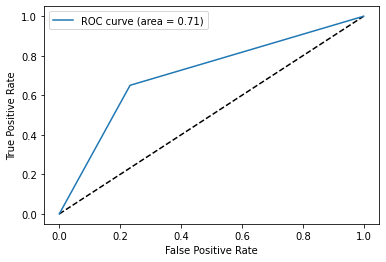

In [147]:
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features=20, max_leaf_nodes=800,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')
Confusion Matrix       : 
 [[13217  2140]
 [  132    97]]
Accuracy of Model      :  0.8542281534710637
Precision of Model     :  0.04336164506034868
Recall of Model        :  0.42358078602620086
F1 Score of Model      :  0.0786699107866991
ROC_AUC score of Model :  0.6421153262682935


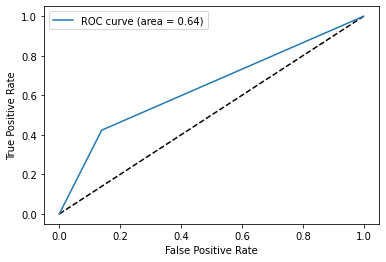

In [148]:
CV_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 3)
CV_dt.fit(X_o_train, y_o_train)
dtc_best = CV_dt.best_estimator_
print(dtc_best)
y_pred = dtc_best.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Logistic Regression**

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix       : 
 [[12350  3007]
 [   96   133]]
Accuracy of Model      :  0.8009110740408059
Precision of Model     :  0.04235668789808917
Recall of Model        :  0.5807860262008734
F1 Score of Model      :  0.07895517957850993
ROC_AUC score of Model :  0.6924897767912617


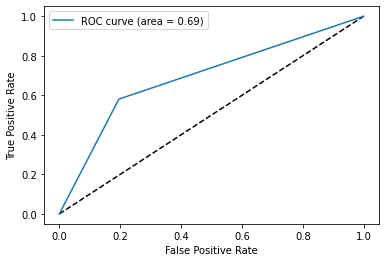

In [163]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
            'max_iter':[40,100],
               'multi_class':['auto'],
               'solver':['saga','newton-cg','sag'],
            'penalty':['l1', 'elasticnet','l2'],
            'C':[0.2,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=40, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix       : 
 [[12133  3224]
 [   61   168]]
Accuracy of Model      :  0.7892339278839985
Precision of Model     :  0.049528301886792456
Recall of Model        :  0.7336244541484717
F1 Score of Model      :  0.09279204639602319
ROC_AUC score of Model :  0.7618438087633679


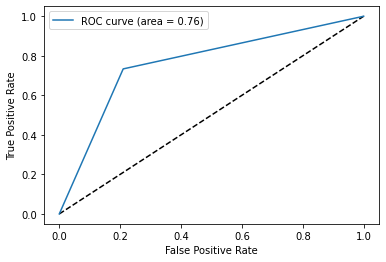

In [164]:
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_u_train, y_u_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=40, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix       : 
 [[12112  3245]
 [   63   166]]
Accuracy of Model      :  0.7877582445784679
Precision of Model     :  0.04866608032834946
Recall of Model        :  0.7248908296943232
F1 Score of Model      :  0.09120879120879122
ROC_AUC score of Model :  0.7567932692458071


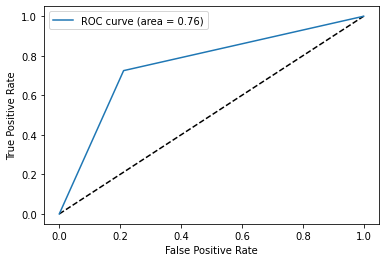

In [165]:
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_o_train, y_o_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)
y_pred = logistic_reg_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

### **Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13174  2183]
 [   85   144]]
Accuracy of Model      :  0.8544847940459387
Precision of Model     :  0.0618822518263859
Recall of Model        :  0.62882096069869
F1 Score of Model      :  0.11267605633802817
ROC_AUC score of Model :  0.7433354005811612


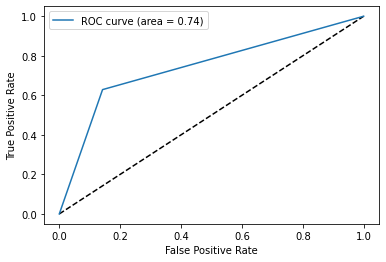

In [166]:
clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Under Sampling

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[12355  3002]
 [   68   161]]
Accuracy of Model      :  0.8030283587835236
Precision of Model     :  0.05090104331331015
Recall of Model        :  0.7030567685589519
F1 Score of Model      :  0.09492924528301887
ROC_AUC score of Model :  0.7537879401823216


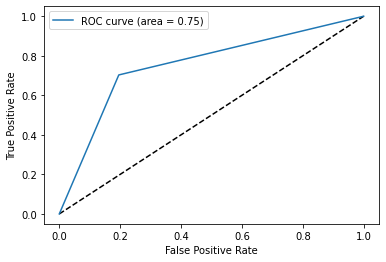

In [167]:
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_u_train, y_u_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)

####Random Over Sampling

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix       : 
 [[13057  2300]
 [   83   146]]
Accuracy of Model      :  0.8471063775182857
Precision of Model     :  0.059689288634505316
Recall of Model        :  0.6375545851528385
F1 Score of Model      :  0.1091588785046729
ROC_AUC score of Model :  0.7438928750469539


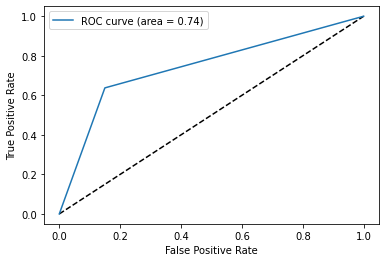

In [168]:
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_o_train, y_o_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)
print_result(y_test=y_test,y_pred=y_pred)